In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from scipy.interpolate import *
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')




# File to Load (Remember to Change These)
FFS = "fantasystatsall.csv"
FFP = 'Scoring_System_ESPN_Classic.csv'
FFSPG= "FantasyStatsByGame\MostStatsPerGame.csv"
test10= "FantasyStatsByGame\r'Use_These.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
FFS_df = pd.read_csv(FFS)
FFP_df = pd.read_csv(FFP)
FFSPG_df = pd.read_csv(FFSPG)
test10_df = pd.read_csv(test10)


# Combine the data into a single dataset
# data_combine = pd.merge(mouse_data,clinical_data, how='left', on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
FFS_df=FFS_df.fillna(0)
FFSPG_df=FFSPG_df.fillna(0)
FFSPG_df.head()
test10_df.head()


FileNotFoundError: [Errno 2] File b"FantasyStatsByGame\r'Use_These.csv" does not exist: b"FantasyStatsByGame\r'Use_These.csv"

In [94]:




#better way
FP_Calc_DF2 = test10_df

act_list = FFP_df["Activity"].tolist()
pts_list = FFP_df["Points"].tolist()


for i in range (len(act_list)):
   try:
       x = FP_Calc_DF2[act_list[i] + " PG"] * pts_list[i]
       FP_Calc_DF2[act_list[i] + " FP"] = x
   except:
       print(act_list[i] + " not a column in FP_Calc_DF2")


FP_Calc_DF2.head()

2pt Pass Conversions not a column in FP_Calc_DF2
2pt Rush Conversions not a column in FP_Calc_DF2
2pt Receiving Conversions not a column in FP_Calc_DF2
PAT not a column in FP_Calc_DF2
Field Goals Missed not a column in FP_Calc_DF2
FG Made (0-39 yards) not a column in FP_Calc_DF2
FG Made (40-49 yards) not a column in FP_Calc_DF2
FG Made (50+ yards)  not a column in FP_Calc_DF2
Kickoff Return TD not a column in FP_Calc_DF2
Punt return TD not a column in FP_Calc_DF2
Interception Return TD not a column in FP_Calc_DF2
Fumble Return TD not a column in FP_Calc_DF2
Blocked Punt Return TD not a column in FP_Calc_DF2
Blocked FG Return TD not a column in FP_Calc_DF2
2pt Return not a column in FP_Calc_DF2
Safety not a column in FP_Calc_DF2
Sack not a column in FP_Calc_DF2
Blocked Punt, PAT, FG not a column in FP_Calc_DF2
Interception not a column in FP_Calc_DF2
Fumble Recovered not a column in FP_Calc_DF2
Safety not a column in FP_Calc_DF2
0 points allowed (PA0) not a column in FP_Calc_DF2
1-6 poi

,Unnamed: 0,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
0,0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.000000,...,6.000000,-2.000000,1.231250,0.375000,0.0,0.000000,0.0,-0.750000,13.356250,0.60594
1,1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,0.090909,...,5.090909,-2.181818,2.045455,1.636364,0.0,0.090909,0.0,-0.363636,15.241818,0.62000
2,2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.000000,...,5.666667,-1.333333,1.533333,1.000000,0.0,0.000000,0.0,-0.166667,14.976667,0.63141
3,3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.000000,...,7.750000,-1.875000,1.687500,0.750000,0.0,0.000000,0.0,-0.250000,17.825000,0.59609
4,4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.000000,...,3.428571,-2.428571,0.928571,0.000000,0.0,0.000000,0.0,-0.142857,9.528571,0.56576


In [95]:
#Calc Fantasy Points
FP_Calc_DF2['Total FP PG']= FP_Calc_DF2['Passing Yards FP']+FP_Calc_DF2['Passing Touchdowns FP'] \
                       +FP_Calc_DF2['Passing Interceptions FP']+FP_Calc_DF2['Rush Yards FP'] \
                        +FP_Calc_DF2['Rush Touchdowns FP']+FP_Calc_DF2['Rec Yards FP']+FP_Calc_DF2['Rec Receptions FP']\
                        +FP_Calc_DF2['Rec Touchdowns FP']+FP_Calc_DF2['Lost Fumbles FP']
FP_Calc_DF2.head()

,Unnamed: 0,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
0,0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.000000,...,6.000000,-2.000000,1.231250,0.375000,0.0,0.000000,0.0,-0.750000,13.356250,0.60594
1,1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,0.090909,...,5.090909,-2.181818,2.045455,1.636364,0.0,0.090909,0.0,-0.363636,15.241818,0.62000
2,2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.000000,...,5.666667,-1.333333,1.533333,1.000000,0.0,0.000000,0.0,-0.166667,14.976667,0.63141
3,3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.000000,...,7.750000,-1.875000,1.687500,0.750000,0.0,0.000000,0.0,-0.250000,17.825000,0.59609
4,4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.000000,...,3.428571,-2.428571,0.928571,0.000000,0.0,0.000000,0.0,-0.142857,9.528571,0.56576


In [96]:
FP_Calc_DF2.columns

Index(['Unnamed: 0', 'Key', 'Player Name', 'Player Team', 'Season', 'Position',
       'Games Played', 'Games Started', 'Season Age',
       'Rec Red Zone Targets PG', 'Rec Receptions PG', 'Rec Touchdowns PG',
       'Rec Yards PG', 'Fumbles PG', 'Lost Fumbles PG', 'Rush Attempts PG',
       'Rush Avg Yards PG', 'Rush Red Zone Attempts PG', 'Rush Scrambles PG',
       'Rush Touchdowns PG', 'Rush Yards PG', 'Passing Completion Pct',
       'Passing Hurries PG', 'Passing Interceptions PG',
       'Passing Redzone Attempts PG', 'Passing Touchdowns PG',
       'Passing Yards PG', 'Field Goal Attempts PG', 'Field Goal Longest',
       'Field Goal Made PG', 'Field Goal Yards PG', 'Extra Pts Attempts PG',
       'Extra Pts Made PG', 'PID', 'Passing Yards FP', 'Passing Touchdowns FP',
       'Passing Interceptions FP', 'Rush Yards FP', 'Rush Touchdowns FP',
       'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP',
       'Lost Fumbles FP', 'Total FP PG', 'Passing_Completion_Pct_adj'],
 

In [97]:
#convert Passing Completion to decimal format 
#remove any player who did not play more than 13 games 
#Set season as INDEX
FP_Calc_DF2['Passing_Completion_Pct_adj']=FP_Calc_DF2['Passing Completion Pct']/100
FP_Calc_DF2= FP_Calc_DF2[FP_Calc_DF2['Games Played'] >= 10]
FP_Calc_DF2.set_index("Season", inplace = True) 
FP_Calc_DF2.head()

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,QB,16,16,30,0.000000,0.000000,...,6.000000,-2.000000,1.231250,0.375000,0.0,0.000000,0.0,-0.750000,13.356250,0.60594
2013,1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,QB,11,9,31,0.090909,0.090909,...,5.090909,-2.181818,2.045455,1.636364,0.0,0.090909,0.0,-0.363636,15.241818,0.62000
2014,2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,QB,12,12,32,0.000000,0.000000,...,5.666667,-1.333333,1.533333,1.000000,0.0,0.000000,0.0,-0.166667,14.976667,0.63141
2015,3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,QB,16,16,33,0.000000,0.000000,...,7.750000,-1.875000,1.687500,0.750000,0.0,0.000000,0.0,-0.250000,17.825000,0.59609
2016,4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,QB,14,11,34,0.000000,0.000000,...,3.428571,-2.428571,0.928571,0.000000,0.0,0.000000,0.0,-0.142857,9.528571,0.56576


In [98]:
#FP_Calc_DF2.to_csv(r'fantasystatsall_NAN.csv')
FP_Calc_DF2.drop('Unnamed: 0', axis=1)

,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,Rec Touchdowns PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,QB,16,16,30,0.000000,0.000000,0.000000,...,6.000000,-2.000000,1.231250,0.375000,0.000000,0.000000,0.000000,-0.750000,13.356250,0.60594
2013,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,QB,11,9,31,0.090909,0.090909,0.000000,...,5.090909,-2.181818,2.045455,1.636364,0.000000,0.090909,0.000000,-0.363636,15.241818,0.62000
2014,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,QB,12,12,32,0.000000,0.000000,0.000000,...,5.666667,-1.333333,1.533333,1.000000,0.000000,0.000000,0.000000,-0.166667,14.976667,0.63141
2015,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,QB,16,16,33,0.000000,0.000000,0.000000,...,7.750000,-1.875000,1.687500,0.750000,0.000000,0.000000,0.000000,-0.250000,17.825000,0.59609
2016,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,QB,14,11,34,0.000000,0.000000,0.000000,...,3.428571,-2.428571,0.928571,0.000000,0.000000,0.000000,0.000000,-0.142857,9.528571,0.56576
2013,8fc65820-f565-44e2-8635-3e1cdf165bf6 2013 768c...,Chris Hogan,Bills,WR,16,0,26,0.000000,0.625000,0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.518750,0.625000,0.000000,-0.000000,1.143750,0.00000
2014,8fc65820-f565-44e2-8635-3e1cdf165bf6 2014 768c...,Chris Hogan,Bills,WR,16,2,27,0.562500,2.562500,0.250000,...,0.000000,-0.000000,0.000000,0.000000,2.662500,2.562500,1.500000,-0.250000,6.475000,0.00000
2015,8fc65820-f565-44e2-8635-3e1cdf165bf6 2015 768c...,Chris Hogan,Bills,WR,16,4,28,0.312500,2.250000,0.125000,...,0.000000,-0.000000,0.025000,0.000000,2.812500,2.250000,0.750000,-0.000000,5.847500,1.00000
2016,8fc65820-f565-44e2-8635-3e1cdf165bf6 2016 9735...,Chris Hogan,Patriots,WR,15,14,29,0.333333,2.533333,0.266667,...,0.000000,-0.000000,0.060000,0.000000,4.533333,2.533333,1.600000,-0.133333,8.593333,0.00000


In [99]:
#create unique Dataset for each position

# FP_Calc_DF3.set_index("Position", inplace=True)
Catch=['WR','TE']
FP_Calc_QB =FP_Calc_DF2[FP_Calc_DF2.Position == 'QB']

FP_Calc_RB =FP_Calc_DF2[FP_Calc_DF2.Position == 'RB']

FP_Calc_Catch =FP_Calc_DF2[FP_Calc_DF2.Position.isin(Catch)]

# surveys_df[surveys_df.year == 2002]
FP_Calc_QB.head()

#FP_Calc_Catch.Position.unique()
#FP_Calc_DF3[FP_Calc_DF3.Position == 'QB']

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,QB,16,16,30,0.000000,0.000000,...,6.000000,-2.000000,1.231250,0.375000,0.0,0.000000,0.0,-0.750000,13.356250,0.60594
2013,1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,QB,11,9,31,0.090909,0.090909,...,5.090909,-2.181818,2.045455,1.636364,0.0,0.090909,0.0,-0.363636,15.241818,0.62000
2014,2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,QB,12,12,32,0.000000,0.000000,...,5.666667,-1.333333,1.533333,1.000000,0.0,0.000000,0.0,-0.166667,14.976667,0.63141
2015,3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,QB,16,16,33,0.000000,0.000000,...,7.750000,-1.875000,1.687500,0.750000,0.0,0.000000,0.0,-0.250000,17.825000,0.59609
2016,4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,QB,14,11,34,0.000000,0.000000,...,3.428571,-2.428571,0.928571,0.000000,0.0,0.000000,0.0,-0.142857,9.528571,0.56576


In [79]:
FP_Calc_QB.head()


,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,QB,16,16,30,0.000000,0.000000,...,6.000000,-2.000000,1.231250,0.375000,0.0,0.000000,0.0,-0.750000,13.356250,0.60594
2013,1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,QB,11,9,31,0.090909,0.090909,...,5.090909,-2.181818,2.045455,1.636364,0.0,0.090909,0.0,-0.363636,15.241818,0.62000
2014,2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,QB,12,12,32,0.000000,0.000000,...,5.666667,-1.333333,1.533333,1.000000,0.0,0.000000,0.0,-0.166667,14.976667,0.63141
2015,3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,QB,16,16,33,0.000000,0.000000,...,7.750000,-1.875000,1.687500,0.750000,0.0,0.000000,0.0,-0.250000,17.825000,0.59609
2016,4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,QB,14,11,34,0.000000,0.000000,...,3.428571,-2.428571,0.928571,0.000000,0.0,0.000000,0.0,-0.142857,9.528571,0.56576


In [80]:
import seaborn as sns

In [81]:
FP_Calc_DF2.columns

Index(['Unnamed: 0', 'Key', 'Player Name', 'Player Team', 'Position',
       'Games Played', 'Games Started', 'Season Age',
       'Rec Red Zone Targets PG', 'Rec Receptions PG', 'Rec Touchdowns PG',
       'Rec Yards PG', 'Fumbles PG', 'Lost Fumbles PG', 'Rush Attempts PG',
       'Rush Avg Yards PG', 'Rush Red Zone Attempts PG', 'Rush Scrambles PG',
       'Rush Touchdowns PG', 'Rush Yards PG', 'Passing Completion Pct',
       'Passing Hurries PG', 'Passing Interceptions PG',
       'Passing Redzone Attempts PG', 'Passing Touchdowns PG',
       'Passing Yards PG', 'Field Goal Attempts PG', 'Field Goal Longest',
       'Field Goal Made PG', 'Field Goal Yards PG', 'Extra Pts Attempts PG',
       'Extra Pts Made PG', 'PID', 'Passing Yards FP', 'Passing Touchdowns FP',
       'Passing Interceptions FP', 'Rush Yards FP', 'Rush Touchdowns FP',
       'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP',
       'Lost Fumbles FP', 'Total FP PG', 'Passing_Completion_Pct_adj'],
      dtype

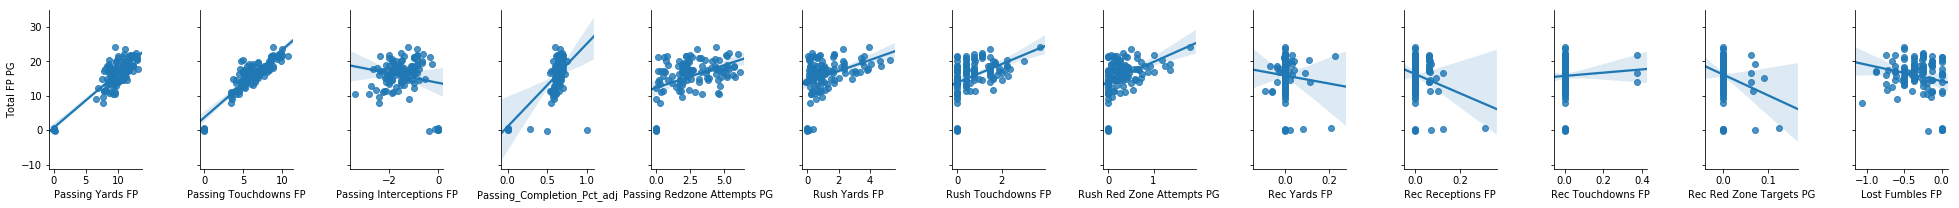

In [82]:
#QB Plot
sns.pairplot(FP_Calc_QB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )



 

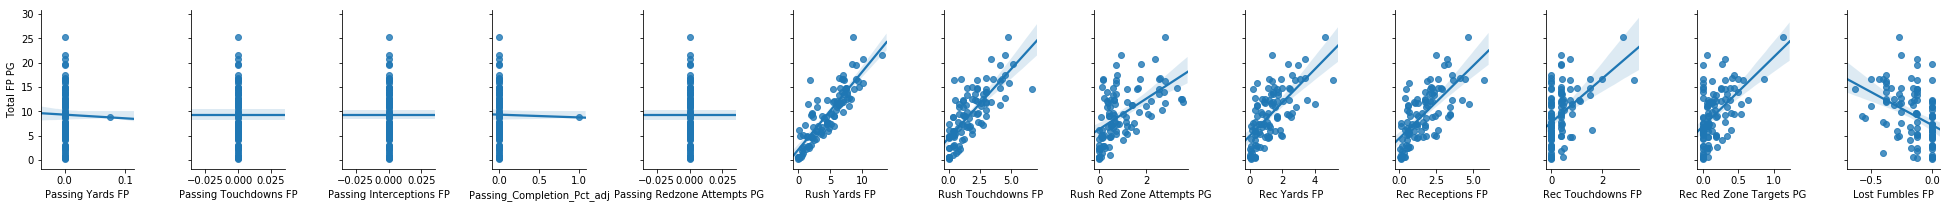

In [83]:
#QB Plot
sns.pairplot(FP_Calc_RB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )



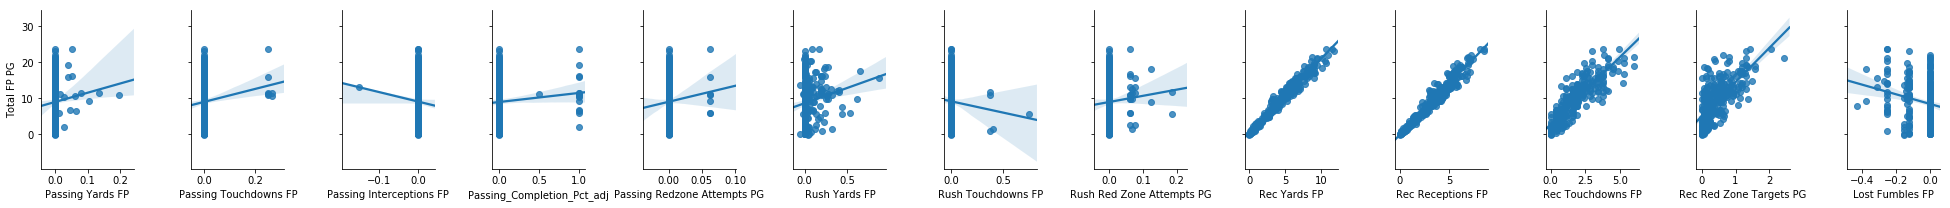

In [13]:
#QB Plot
sns.pairplot(FP_Calc_Catch, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )



In [100]:
# features_cols = [ 'Passing Completion Pct', 'Passing Hurries', 'Passing Interceptions',
#        'Passing Redzone Attempts', 'Passing Touchdowns', 'Passing Yards',, 'Rec Receptions', 'Rec Red Zone Targets',
#        'Rec Touchdowns', 'Rec Yards', 'Fumbles', 'Lost Fumbles',
#        'Rush Attempts', 'Rush Avg Yards', 'Rush Red Zone Attempts',
#        'Rush Scrambles', 'Rush Touchdowns', 'Rush Yards',]
#'Passing Completion Pct','Season Age'
#'Rec Yards FP'                 ,'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP'
# 'Rush Yards FP', 'Passing Completion Pct'
features_cols = ['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP','Lost Fumbles FP']

features_cols_QB=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                    'Rush Yards FP', 'Rush Touchdowns FP']

features_cols_RB = ['Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP','Lost Fumbles FP']



In [15]:
#remove 2012 for setup



In [120]:
FP_Calc_QB_x =FP_Calc_QB
# [FP_Calc_QB.index != 2018]

x = FP_Calc_QB_x[features_cols_QB]
x
# xRB = FP_Calc_RB[features_cols_RB]

# xRB

,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP
Season,,,,,
2012,8.500000,6.000000,-2.000000,1.231250,0.375000
2013,8.923636,5.090909,-2.181818,2.045455,1.636364
2014,8.276667,5.666667,-1.333333,1.533333,1.000000
2015,9.762500,7.750000,-1.875000,1.687500,0.750000
2016,7.742857,3.428571,-2.428571,0.928571,0.000000
2012,7.688000,3.466667,-2.400000,0.186667,0.000000
2012,12.067500,8.500000,-1.000000,0.200000,1.500000
2013,10.857500,6.250000,-1.375000,0.112500,0.000000
2014,10.272500,8.250000,-1.125000,0.356250,0.000000


In [139]:
target_cols = ['Player Name','Total FP PG']

In [48]:
FP_Calc_QB.index

Int64Index([2012, 2015, 2016, 2012, 2012, 2013, 2014, 2015, 2017, 2018,
            ...
            2015, 2016, 2017, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Season', length=103)

In [140]:
FP_Calc_QB_y =FP_Calc_QB
# [FP_Calc_QB.index != 2012]
y = FP_Calc_QB_y[target_cols]
y

# print(len(FP_Calc_QB_y)),print(len(FP_Calc_QB_x))
FP_Calc_QB_ygroupby[PL

,Player Name,Total FP PG
Season,,
2012,Ryan Fitzpatrick,13.356250
2013,Ryan Fitzpatrick,15.241818
2014,Ryan Fitzpatrick,14.976667
2015,Ryan Fitzpatrick,17.825000
2016,Ryan Fitzpatrick,9.528571
2012,Mark Sanchez,7.874667
2012,Tom Brady,21.267500
2013,Tom Brady,15.470000
2014,Tom Brady,17.378750


In [151]:
FP_Calc_QB_y.reset_index(drop=True)

# FP_Calc_QB_y.groupby([('Player Name','Season')]).count()

KeyError: ('Player Name', 'Season')

In [126]:
print(len(FP_Calc_QB_y)),print(len(FP_Calc_QB_x))

117
117


(None, None)

In [50]:
FP_Calc_QB


,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,QB,16,16,30,0.000000,0.000000,...,6.000000,-2.000000,1.231250,0.375000,0.000000,0.000000,0.000,-0.750000,13.356250,0.60594
2015,3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,QB,16,16,33,0.000000,0.000000,...,7.750000,-1.875000,1.687500,0.750000,0.000000,0.000000,0.000,-0.250000,17.825000,0.59609
2016,4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,QB,14,11,34,0.000000,0.000000,...,3.428571,-2.428571,0.928571,0.000000,0.000000,0.000000,0.000,-0.142857,9.528571,0.56576
2012,63,e6c40f79-1bbd-4f62-9391-7f535f110c0d 2012 5fee...,Mark Sanchez,Jets,QB,15,15,26,0.000000,0.000000,...,3.466667,-2.400000,0.186667,0.000000,0.000000,0.000000,0.000,-1.066667,7.874667,0.54305
2012,96,41c44740-d0f6-44ab-8347-3b5d515e5ecf 2012 9735...,Tom Brady,Patriots,QB,16,16,35,0.000000,0.000000,...,8.500000,-1.000000,0.200000,1.500000,0.000000,0.000000,0.000,-0.000000,21.267500,0.62951
2013,97,41c44740-d0f6-44ab-8347-3b5d515e5ecf 2013 9735...,Tom Brady,Patriots,QB,16,16,36,0.000000,0.000000,...,6.250000,-1.375000,0.112500,0.000000,0.000000,0.000000,0.000,-0.375000,15.470000,0.60510
2014,98,41c44740-d0f6-44ab-8347-3b5d515e5ecf 2014 9735...,Tom Brady,Patriots,QB,16,16,37,0.000000,0.000000,...,8.250000,-1.125000,0.356250,0.000000,0.000000,0.000000,0.000,-0.375000,17.378750,0.64089
2015,99,41c44740-d0f6-44ab-8347-3b5d515e5ecf 2015 9735...,Tom Brady,Patriots,QB,16,16,38,0.000000,0.062500,...,9.000000,-0.875000,0.331250,1.125000,0.225000,0.062500,0.000,-0.250000,21.543750,0.64423
2017,101,41c44740-d0f6-44ab-8347-3b5d515e5ecf 2017 9735...,Tom Brady,Patriots,QB,16,16,40,0.000000,0.000000,...,8.000000,-1.000000,0.175000,0.000000,0.000000,0.000000,0.000,-0.375000,18.242500,0.66265


In [ ]:
from sklearn.model_selection import train_test_split

In [138]:
x_train = x[x.index != 2018]
y_train = y[y.index != 2012]
x_test = x[x.index == 2017]
y_test = y[y.index == 2018]

# xRB_train = xRB[xRB.index < 2018]
# yRB_train = yRB[yRB.index < 2018]
# xRB_test = xRB[xRB.index == 2018]
# yRB_test = yRB[yRB.index == 2018]

In [137]:
# x_train = x_train.sort_index() 
# y_train = y_train.sort_index() 
print(len(x_train)),print(len(y_train))

103
100


(None, None)

In [89]:
x_train.head(),y_train.head()

(        Passing Yards FP  Passing Touchdowns FP  Passing Interceptions FP  \
 Season                                                                      
 2012            8.500000               6.000000                 -2.000000   
 2013            8.923636               5.090909                 -2.181818   
 2014            8.276667               5.666667                 -1.333333   
 2015            9.762500               7.750000                 -1.875000   
 2016            7.742857               3.428571                 -2.428571   
 
         Rush Yards FP  Rush Touchdowns FP  
 Season                                     
 2012         1.231250            0.375000  
 2013         2.045455            1.636364  
 2014         1.533333            1.000000  
 2015         1.687500            0.750000  
 2016         0.928571            0.000000  ,         Total FP PG
 Season             
 2013      15.241818
 2014      14.976667
 2015      17.825000
 2016       9.528571
 2013      

In [117]:
print(x_train.shape),print(y_train.shape)

(103, 5)
(97, 1)


(None, None)

In [ ]:
xRB_train.head()

In [ ]:
print(x_test.shape),print(y_test.shape), print(results.predict.shape)
#https://stats.stackexchange.com/questions/146804/difference-between-statsmodel-ols-and-scikit-linear-regression

In [54]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train)
results = model.fit()
# .astype(float)
results.summary()

# xRB_train = sm.add_constant(xRB_train)
# model = sm.OLS(yRB_train,xRB_train)
# RBresults = model.fit()
# # .astype(float)
# RBresults.summary()

ValueError: The indices for endog and exog are not aligned

In [ ]:
FP_Calc_DF2.to_csv(r'Stats.csv')

In [ ]:
predictions=results.predict(x_test)

In [ ]:
x_test.head()

In [ ]:
est.head

In [ ]:
est

In [ ]:
results.predict(x_test)

In [ ]:
results.predict

In [ ]:
x_test


In [ ]:
y_test